In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.interpolate import PchipInterpolator
# import scipy
# import sympy as sp
# import pandas as pd

---

Пусть задана тестовая функция $ f(x) = (sin x) (1 + x) ^ {\frac{1}{3}} $, на интервале $ [a, b], где  \ a=1, \ b=6 $
1) Построить график этой функции на интервале [a, b]. Подготовить таблицу значений функций $f(x) \ и \  f ^ {'} (x) $ на интервале [a, b] для 5 равноотстоящих значений аргумента (узлов интерполяции). Построить точечный график f(x) по полученной таблице. Выбрать точку t, не принадлежащую узлам. 
2) Построить функцию g(x), выполняющую кусочную линейную интерполяцию по заданной таблице. Вычислить g(t) и сравнить с f(t). Показать на одном чертеже графики функций f(x) (непрерывный и точечный) и функции g(x) на интервале [a, b].
3) Построить функцию g(x), выполняющую кусочную эрмитову интерполяцию по заданной таблице. Вычислить g(t) и сравнить с f(t). Показать на одном чертеже графики функций f(x) (непрерывный и точечный) и функции g(x) на интервале [a, b]. 


***

### Постановка задачи

<u>Цель</u>: Получить функцию кусочной линейной интерпаляции и кусочной эрмитовой интерполяции.

<u>Исходные данные</u>: тестовая функция f(x) на интервале $ [a, b], где  \ a=1, \ b=6 $

<u>Модельные представления</u>: Кусочно-линейная интерполяция состоит в представлении таблично заданной функции на каждом отрезке между абсциссами узловых точек. Интерполяция Эрмита — это метод численного приближения функции, который позволяет находить аппроксимацию производных и значений функции в точках, используя ограниченные данные. Основана на расчёте значения функции и её производных в точках, используя доступные данные об значениях функции и её производных в некотором наборе точек. Этот метод позволяет построить кусочно-кубическую кривую, которая проходит через эти точки и обладает гладкостью.

<u>Критерий оценки результата</u>: функция g(x) верно выполняет интерполяцию и значения g(t) сравнимы с f(t).

***

1) Построить график этой функции на интервале [a, b]. Подготовить таблицу значений функций $f(x) \ и \  f ^ {'} (x) $ на интервале [a, b] для 5 равноотстоящих значений аргумента (узлов интерполяции). Построить точечный график f(x) по полученной таблице. Выбрать точку t, не принадлежащую узлам. 

In [2]:
# Заданный интервал [a, b]
a, b = 1, 6

# Тестовая функция f(x)
def f(x):
    return np.sin(x) * (1 + x)**(1/3)

# Значения аргументов для таблицы (5 равноотстоящих значений)
x_values = np.linspace(a, b, 5)

In [3]:
# Таблица значений f(x) и f'(x)
table = np.array([x_values, f(x_values), np.gradient(f(x_values), x_values)]).T

# Печать таблицы значений
print("Таблица значений:")
print("x\tf(x)\tf'(x)")
for row in table:
    print("\t".join(map(str, row)))

Таблица значений:
x	f(x)	f'(x)
1.0	1.060187006635238	0.07386590937725775
2.25	1.15251939335681	-0.6557269422468079
3.5	-0.579130348981782	-1.1771105373546873
4.75	-1.790256950029908	0.017851091810869767
6.0	-0.5345026194546075	1.0046034644602404


In [6]:
# Точка t на интервале [a,b], которая не совпадает с узлами интерполяции. 
t = 4

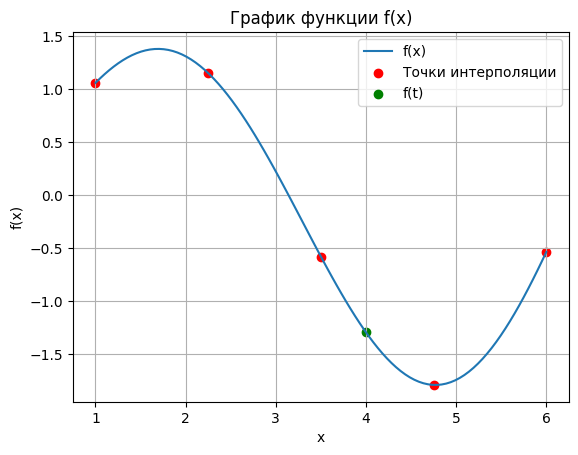

In [12]:
# Построение графика функции f(x)
x_plot = np.linspace(a, b, 100)
plt.plot(x_plot, f(x_plot), label='f(x)')
plt.scatter(x_values, f(x_values), color='red', label='Точки интерполяции')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.scatter(t, f(t), color='green', label='f(t)')
plt.legend()
plt.title('График функции f(x)')
plt.grid(True)
plt.show()

---

2) Построить функцию g(x), выполняющую кусочную линейную интерполяцию по заданной таблице. Вычислить g(t) и сравнить с f(t). Показать на одном чертеже графики функций f(x) (непрерывный и точечный) и функции g(x) на интервале [a, b].

In [9]:
# Кусочная линейная интерполяция
linear_interpolation = interp1d(x_values, f(x_values), kind='linear', 
                                fill_value='extrapolate')

# Значение g(t)
g_t = linear_interpolation(t)

# Печать результатов
print("Выбранная точка t:", t)
print("Значение g(t):", g_t)
print("Значение f(t):", f(t))

Выбранная точка t: 4
Значение g(t): -1.0635809894010324
Значение f(t): -1.294114063361461


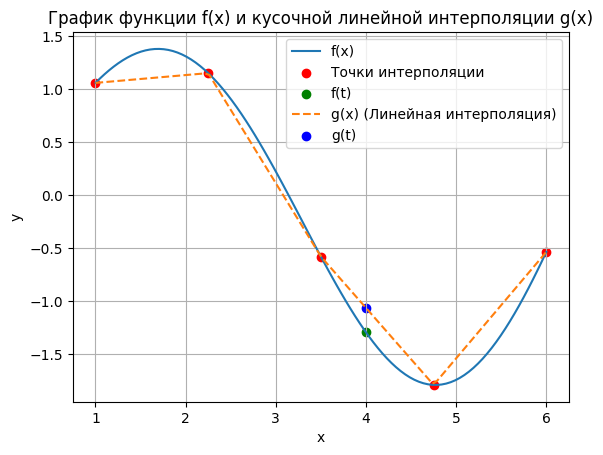

In [11]:
# Построение графиков
x_plot = np.linspace(a, b, 100)
plt.plot(x_plot, f(x_plot), label='f(x)')
plt.scatter(x_values, f(x_values), color='red', label='Точки интерполяции')
plt.scatter(t, f(t), color='green', label='f(t)')

plt.plot(x_plot, linear_interpolation(x_plot), label='g(x) (Линейная интерполяция)', linestyle='dashed')
plt.scatter(t, g_t, color='blue', label='g(t)')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('График функции f(x) и кусочной линейной интерполяции g(x)')
plt.grid(True)
plt.show()

---

3) Построить функцию g(x), выполняющую кусочную эрмитову интерполяцию по заданной таблице. Вычислить g(t) и сравнить с f(t). Показать на одном чертеже графики функций f(x) (непрерывный и точечный) и функции g(x) на интервале [a, b]. 

In [38]:
# Кусочная эрмитова интерполяция
hermite_interpolation = PchipInterpolator(x_values, np.array(f(x_values)))

In [41]:
# Значение g(t)
t = 4
g_t = hermite_interpolation(t)

# Вывод результатов
print(f"Выбранная точка t: {t}")
print(f"Значение g(t): {g_t}")
print(f"Значение f(t): {f(t)}")

Выбранная точка t: 4
Значение g(t): -1.2106976977661768
Значение f(t): -1.294114063361461


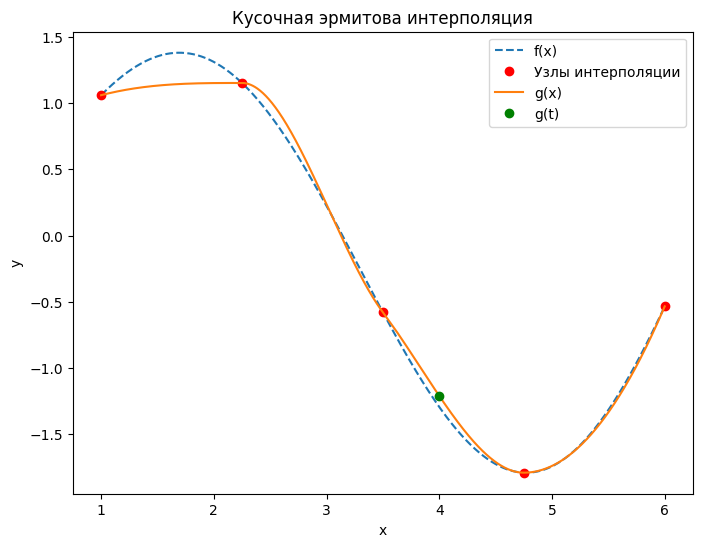

In [42]:
# Графики
x_plot = np.linspace(min(x_values), max(x_values), 1000)
plt.figure(figsize=(8, 6))
plt.plot(x_plot, np.sin(x_plot) * (1 + x_plot)**(1/3), label='f(x)', linestyle='dashed')
plt.plot(x_values, y_values, 'ro', label='Узлы интерполяции')
plt.plot(x_plot, hermite_interpolation(x_plot), label='g(x)')
plt.plot(t, g_t, 'go', label=f'g(t)')
plt.title('Кусочная эрмитова интерполяция')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


***

## Контрольные вопросы:

1.	Дайте определение обобщенного многочлена по системе линейно-независимых функций. 

Обобщенный многочлен по системе линейно-независимых функций представляет собой линейную комбинацию этих функций с коэффициентами, которые могут быть произвольными функциями независимой переменной. Обычные многочлены представляют собой частный случай обобщенных многочленов, когда коэффициенты являются константами.

Пусть выбрана система линейно-независимых функций:

$$ S = \left\{  \phi_{i} (x) \right\} ^{\infty}_{i=0} $$

Обобщённый многочлен степени n по системе функций S:

$$ \Phi (x) = c_0 \phi_0 (x) + c_1 \phi_1 (x) + \dots + c_n \phi_n (x) = \sum_{i=0}^{n} c_i \phi_i (x) $$ 

---

3.	В каких случаях задача интерполяции с помощью обобщенного многочлена по системе линейно-независимых функций имеет единственное решение. Ответ пояснить.

Задача интерполяции с помощью обобщенного многочлена по системе линейно-независимых функций имеет единственное решение в случае выполнения следующих условий:

1. Число узлов интерполяции равно размерности системы: Если система функций имеет размерность n, то для ее интерполяции должно быть выбрано ровно n узлов интерполяции. Интерполяция с использованием меньшего числа узлов может привести к неединственному решению.
2. Различные узлы интерполяции: Узлы интерполяции должны быть различными, т.е., не существует двух различных узлов, соответствующих одной и той же точке на интервале интерполяции. В противном случае, задача может иметь бесконечное количество решений.


---

5.	Как следует выбрать узлы интерполяции, если необходимо минимизировать погрешность интерполяции в определенной точке? Поясните ответ.

Если необходимо, чтобы погрешность интерполяции была минимальной на всём отрезке интерполяции, то узлы следует выбирать в месте расположения нулей многочлена Чебышева $ T_{n+1} (x) $ n+1 порядка на этом отрезке, поскольку это - наименее уклоняющийся от нуля многочлен.

$ T_{n+1} (x) \ и \ \omega_{n+1} (x) $ будут отличаться только множителем, так как они в этом случае будут иметь одни и те же корни.

---

8.	Укажите оценку погрешности многочлена Лагранжа. Почему она растет вне отрезка, содержащего узлы интерполяции.

Справедлива оценка:

$$ |f(\bar{x}) - L_n (\bar{x}) | \leq \frac{M_{n+1}}{{(n+1)!}} | \omega_{n+1} (\bar{x}) |, \ 
M_{n+1} = \max_{\substack{a \leq x \leq b}} |f^{n+1} (x) | $$

Погрешность интерполяции растёт для точек, расположенных вне отрезка [a, b]. Потому что вне отрезка, содержащего узлы интерполяции, выражение $ \omega_{n+1} (\bar{x}) $ может принимать большие значения.

---

13.	Дайте определение интерполяционного многочлена Эрмита. Какой тип интерполяции можно выполнить с помощью многочлена Эрмита – глобальную или локальную. Поясните ответ.

+Интерполяционный многочлен Эрмита представляет собой многочлен, который интерполирует значения функции и её производных в заданных точках. Он может использоваться для интерполяции в узлах, где известны значения функции, её первой производной, второй производной и так далее.

С помощью многочлена Эрмита можно выполнить локальную интерполяцию. Локальная интерполяция означает, что многочлен Эрмита строится вокруг конкретной точки, используя информацию о функции и её производных в этой точке. В отличие от глобальной интерполяции, локальная ориентирована на малые участки функции и может быть более точной в окрестности конкретной точки.

Многочлен Эрмита 3-й степени для интерполирования функции, по двум двукратным узлам:

Пусть в точках $ x_1 \ и \ x_2 $ известны значения функции f(x) и ее производных
$$ x_1 \ \ \ y_1 = f(x_1) \ \ \ p_1 = f^{'}(x_1) \\ x_2 \ \ \ y_2 = f(x_2) \ \ \ p_2 = f^{'}(x_2) $$

Многочлен Эрмита H(x), для которого
$$ H(x_1) = y_1; \\ H(x_2) = y_2; \\ H^{'}(x_1) = p_1; \\ H{'}(x_2) = p_2 $$

Имеет вид:

$$ H(x) = y_1 \frac{(x-x_2)^2 (2 (x-x_1) + h)}{h^3} +⥂⥂ y_2 \frac{(x-x_1)^2 (2 (x_2-x) + h)}{h^3} 
+ p_1 \frac{(x-x_2)^2 (x-x_1)}{h^2} +⥂ p_2 \frac{(x-x_1)^2 (x-x_2)}{h^2} $$

где $ h = x_2 - x_1 $